### Python module/package imports for this chapter

In [10]:
import sys, os, math, random, functools

import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim

%matplotlib inline

from IPython.display import display, HTML

### Code from previous videos

In [11]:
from turtle import Turtle, Terrarium

In [12]:
def fb(turtle,distance):
    turtle.forward(distance)
    turtle.back(distance)

Turtle.fb = fb

In [13]:
def F(dist):
    return functools.partial(Turtle.forward,distance=dist)

def L(ang):
    return functools.partial(Turtle.left,angle=ang)

In [14]:
def iterated(f,n):
    def iterf(arg):
        ret = arg
        for i in range(n):
            ret = f(ret)
        return ret
    
    return iterf

## A fractal tree: solution

In [19]:
def funcbranch(steps):
    newsteps = []
    
    for step in steps:
        if step.func is Turtle.fb:
            dist = step.keywords['distance']
            newsteps += [F(dist), L(45), FB(dist/2), L(-90), FB(dist/2), L(45), F(-dist)]
        else:
            newsteps += [step]
            
    return newsteps

In [20]:
def FB(dist):
    return functools.partial(Turtle.fb, distance=dist)

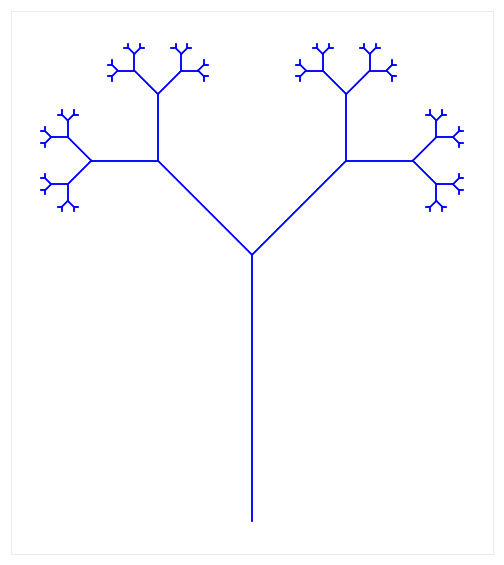

In [24]:
with Terrarium(animate=False, figsize = 10) as t:
    t1 = Turtle(t)
    t1.left(90)

    for step in iterated(funcbranch,6)([FB(50)]):
        step(t1)